# 9 Clustering 

## 1. DBSCAN
Using DBSCAN iterate (for-loop) through different values of `min_samples` (1 to 10) and `epsilon` (.05 to .5, in steps of .01)  to find clusters in the road-data used in the Lesson and calculate the Silohouette Coeff for `min_samples` and `epsilon`. Plot **_one_** line plot with the multiple lines generated from the min_samples and epsilon values. Use a 2D array to store the SilCoeff values, one dimension represents `min_samples`, the other represents epsilon.

In [1]:
import pandas as pd
import numpy as np

import seaborn
import matplotlib.pyplot as plt
%matplotlib notebook

from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score as ss

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('../data/3D_spatial_network.txt.gz', header=None, names=['osm', 'lat','lon','alt'])
data = data.drop(['osm'], axis=1).sample(10000)
data.head()

,lat,lon,alt
75877,9.660717,56.593893,12.707167
116572,8.826362,56.778437,11.981711
163166,10.277342,57.336553,44.880690
239773,8.918686,56.634336,38.075454
164180,8.696293,57.083831,20.681113


In [3]:
min_samples = list(range(1,11))
epsilon = np.arange(0.05, 0.51, 0.01)

info = pd.DataFrame(columns = ['Min Samples', 'Epsilon', 'Silhouette Score'])
for sample in min_samples:
    for eps in epsilon:
        dbscan = DBSCAN(eps = eps, min_samples = sample)
        data.cluster = dbscan.fit_predict(data[['lat','lon', 'alt']])
        score = ss(data[['lon', 'lat', 'alt']], data.cluster)
        stats = [sample, eps, score]
        stats = pd.Series(stats, index = info.columns)
        info = info.append(stats, ignore_index=True)

In [4]:
info.head()

,Min Samples,Epsilon,Silhouette Score
0,1.0,0.05,0.137748
1,1.0,0.06,0.158102
2,1.0,0.07,0.167342
3,1.0,0.08,0.165878
4,1.0,0.09,0.163465


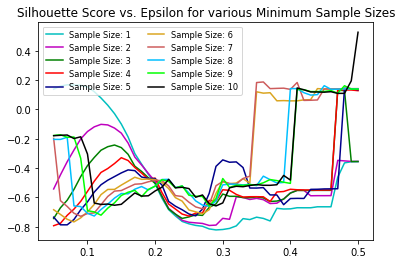

In [5]:
from matplotlib.font_manager import FontProperties

fig, ax = plt.subplots()

colours = ['c', 'm', 'g', 'red', 'darkblue', 'goldenrod', 'indianred', 'deepskyblue', 'lime', 'k']

for sample in min_samples:
    info_filt = info[info['Min Samples'] == sample]
    plt.plot(info_filt['Epsilon'], info_filt['Silhouette Score'], c = colours[sample - 1], label = 'Sample Size: ' + str(sample) )
    
fontP = FontProperties()
fontP.set_size('small')

plt.title('Silhouette Score vs. Epsilon for various Minimum Sample Sizes')
plt.legend(loc="best", prop = fontP, ncol=2)

In [6]:
twoD_array = info.to_numpy()
twoD_array

array([[ 1.        ,  0.05      ,  0.137748  ],
       [ 1.        ,  0.06      ,  0.15810201],
       [ 1.        ,  0.07      ,  0.16734179],
       ...,
       [10.        ,  0.48      ,  0.10905704],
       [10.        ,  0.49      ,  0.19413763],
       [10.        ,  0.5       ,  0.52553576]])

## 2. Clustering your own data
Using your own data, find relevant clusters/groups within your data. If your data is labeled already, with a class that you are attempting to predict, be sure to not use it in fitting/training/predicting. 

You may use the labels to compare with predictions to show how well the clustering performed using one of the clustering metrics (http://scikit-learn.org/stable/modules/clustering.html#clustering-performance-evaluation). 

If you don't have labels, use the silhouette coefficient to show performance. Find the optimal fit for your data but you don't need to be as exhaustive as above.

Additionally, show the clusters in 2D and 3D plots. 

For bonus, try using PCA first to condense your data from N columns to less than N.

Two items are expected: 
- Metric Evaluation Plot
- Plots of the clustered data

In [7]:
heart = pd.read_csv("../data/heart.csv")

heart.head(5)

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No


In [8]:
## find optimal metrics ##
from sklearn.cluster import KMeans

ks = np.arange(2,20, 1)

#remove nas
X = heart.drop(['ChestPain', 'Thal', 'AHD'], axis = 1)

X = X.dropna()

info = pd.DataFrame(columns = ['Cluster Count', 'Silhouette Score'])
for k in ks:
    km = KMeans(n_clusters = k, random_state = 1234)
    X.cluster = km.fit_predict(X)
    score = ss(X, X.cluster)
    stats = [k, score]
    stats = pd.Series(stats, index = info.columns)
    info = info.append(stats, ignore_index=True)
    
info['Silhouette Score'] = np.abs(info['Silhouette Score'])

info.sort_values(by='Silhouette Score', ascending=False).head(5)

,Cluster Count,Silhouette Score
0,2.0,0.387950
1,3.0,0.286807
3,5.0,0.268041
6,8.0,0.267380
4,6.0,0.265890


Based on the above table, the optimal number of clusters 2

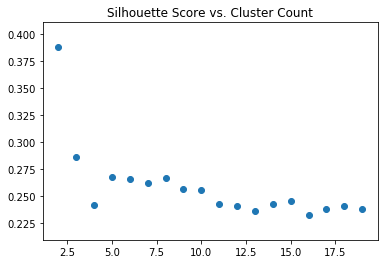

In [9]:
#compare
fig, ax = plt.subplots()

plt.scatter(info['Cluster Count'], info['Silhouette Score'])
plt.title('Silhouette Score vs. Cluster Count')

plt.show()

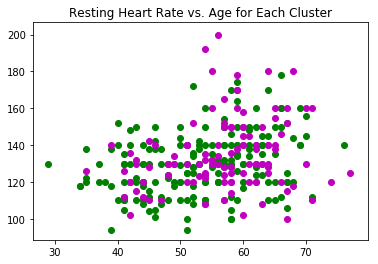

In [12]:
km = KMeans(n_clusters = 2, random_state = 1234)

heart = heart.dropna()

heart['Cluster'] = km.fit_predict(heart.drop(['ChestPain', 'Thal', 'AHD'], axis = 1))

#Show clusters vs. age
fig, ax = plt.subplots()

clust1 = heart[heart['Cluster'] == 0]
clust2 = heart[heart['Cluster'] == 1]                          
                                     
plt.scatter(clust1['Age'], clust1['RestBP'], c = 'g')
plt.scatter(clust2['Age'], clust2['RestBP'], c = 'm')


plt.title('Resting Heart Rate vs. Age for Each Cluster')

plt.show()

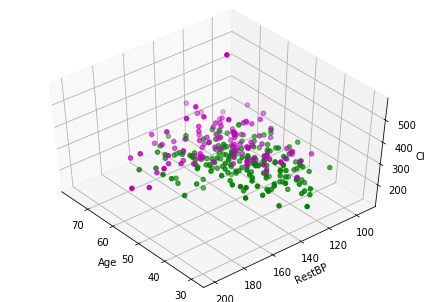

In [15]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
plt.clf()

ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=140)

plt.cla()

ax.scatter(clust1['Age'], clust1['RestBP'], clust1['Chol'], c = 'g', s=20)
ax.scatter(clust2['Age'], clust2['RestBP'], clust2['Chol'], c = 'm', s=20)


ax.set_xlabel('Age')
ax.set_ylabel('RestBP')
ax.set_zlabel('Chol')

plt.show()